<a href="https://colab.research.google.com/github/StephenMartino4/Computational-Physics/blob/main/Stephen_Martino_Lab08_part2_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pyplot and numpy
import numpy as np
from matplotlib import pyplot as plt

# import fft and ifft from numpy.fft
from numpy.fft import fft
from numpy.fft import ifft

# Part 1: Code Your Own FFT

(5 points)

Using the slides from class, implement your own version of the discrete fourier transform.




In [ ]:
from numpy import zeros
from cmath import exp,pi

# your function here
def dft(y):
  """
  PARAMETERS
  y: array giving amplitude at evenly spaced time intervals
  RETURN
  c: fourier coefficients
  """
  # you can copy code from the slides
  N = len(y)
  c = np.zeros(N//2+1,complex)
  for n in range(N//2+1):
    for m in range(N):
      c[n]+=y[m]*np.exp(-2j*np.pi*m*n/N)
  return c

Rebuild your composite cosine wave from the first part of the lab, and feed the amplitude into your dft function.  Compare your results with those from the `numpy.fft.fft` function.

[2.  1.  0.5]


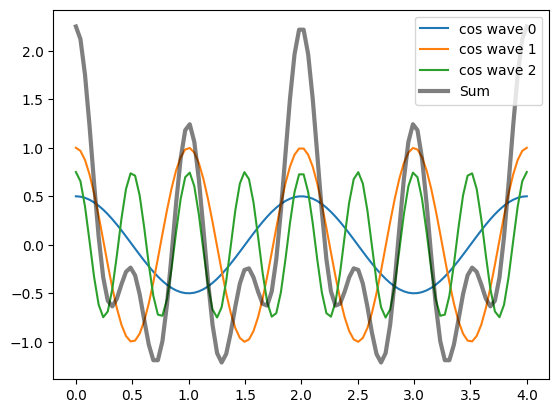

In [ ]:
# rebuild sum of 3 cosine waves here
om = np.array([np.pi,2*np.pi,4*np.pi])
Twave = 2*np.pi/om
print(Twave)
amp = [0.5,1,0.75]
phi = [np.pi/2,np.pi,3*np.pi/2]
phi = np.zeros(len(om))
t = np.linspace(0,4,100)
plt.figure()
sumwave = np.zeros(len(t))
for i,o in enumerate(om):
  y = amp[i]*np.cos(om[i]*t+phi[i])
  sumwave += y
  plt.plot(t,y,label=f"cos wave {i}")
plt.plot(t,sumwave,lw='3',color='k',ls='-',label='Sum',alpha=0.5)
plt.legend()

In [ ]:
# pass your y array into your dft function
c = dft(sumwave)

In [ ]:
# compare the output from your function with the output from np.fft.fft
# plot the frequency spectrum for both
d = np.fft.rfft(sumwave)
print(len(c))
print(len(d))

51
51


Text(0, 0.5, 'Amplitude of Fourier Coefficient')

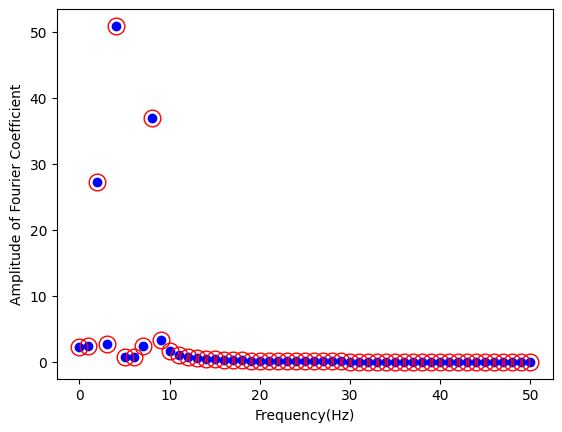

In [ ]:
plt.figure()
plt.plot(np.abs(c),'bo')
plt.plot(np.abs(d),'ro',markersize = 12,mfc="None")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude of Fourier Coefficient")

In [ ]:
# time how long it takes the dft function to run
%time dft(sumwave)

CPU times: user 16.8 ms, sys: 169 µs, total: 17 ms
Wall time: 22.1 ms


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

In [ ]:
# time how long it takes the fft fuction to run
%time fft(sumwave)

CPU times: user 59 µs, sys: 0 ns, total: 59 µs
Wall time: 62.7 µs


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

# Part 2: The Inverse Fourier Transform

(5 points)

Take the `fft` and then the `ifft` of your summed cosine wave.

```
Y = fft(sumwave)
ynew = ifft(Y)
```

Compare the output of the `ifft` (ynew) with the original wave (sumwave). To do this, plot both waves on the same plot.  Plot the original with a solid line and the recreated wave with black circles.  Be sure to add a legend and lable your axes.

Here is my result for comparison:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p2.png" width=300 >

In [ ]:
n=len(t)
TMAX = (t[1]-t[0])*(n-1)
df = 1/TMAX # this is the lowest frequency we can sample

frequency=np.arange(int(n//2)+1)*df

In [ ]:
# your code here
from numpy import fft

Y = np.fft.rfft(sumwave)
ynew = np.fft.irfft(Y)

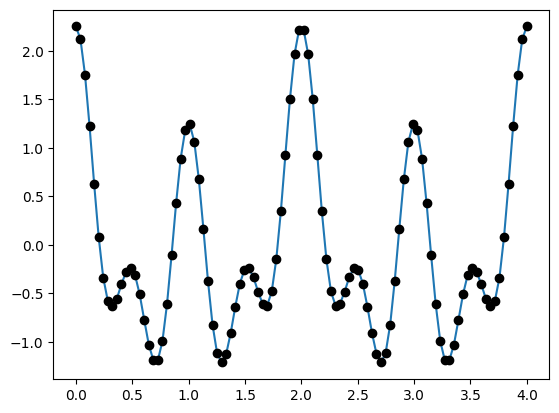

In [ ]:
# your plot here
plt.figure()
plt.plot(t,ynew)
plt.plot(t,sumwave,'ko')

# Part 3: Filter out noise from an audio signal

(5 points)

Make a program that will filter out noise from an audio signal.  
* To do this, you should construct a sine or cosine function, with a frequency of 1 Hz.

* Add two additional cosine functions with a frequency that are 10 and 15 times higher and an amplitude that is 10 and 15 times lower.

* We will consider the high frequency waves to be noise.

* Make a function called `filter_noise` that takes the input wave and returns the cleaned function

Here is the wave I made:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3a.png" width=300 >


Here is the a figure showing the Fourier components of the original and cleaned signal:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3b.png" width=300 >

Here is my input and cleaned signals:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3c.png" width=300 >

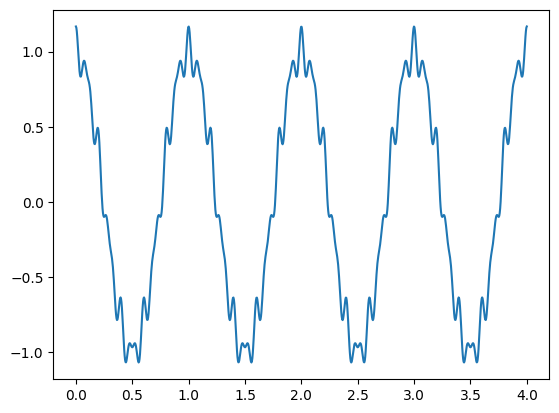

In [ ]:
# Your code here to construct input signal
frequency = 1
T = 1/frequency
time = np.linspace(0,4*T,1000)
sumwave = np.cos(2*np.pi*frequency*time)
sumwave += 0.1*np.cos(2*np.pi*10*frequency*time)
sumwave += 1/15*np.cos(2*np.pi*15*frequency*time)

# plot the input signal
plt.figure()
plt.plot(time,sumwave)


In [ ]:
def filter_noise(y,t,fmax=5):
  # take the fft
  Y = np.fft.rfft(y)
  yfiltered = Y.copy()

  # filter noise - any frequencies above fmax
  TMAX = (t[1]-t[0])*(len(t)-1)
  df = 1/TMAX # this is the lowest frequency we can sample
  frequency=np.arange(int(len(t)//2)+1)*df
  for f in range(len(frequency)):
    if frequency[f] >= fmax:
      yfiltered[f] = 0
  # take the ifft of the filtered wave
  B = np.fft.irfft(yfiltered)
  # return results
  plt.figure()
  plt.plot(frequency,Y,'bo')
  plt.plot(frequency, yfiltered,'ro')
  return B, frequency

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


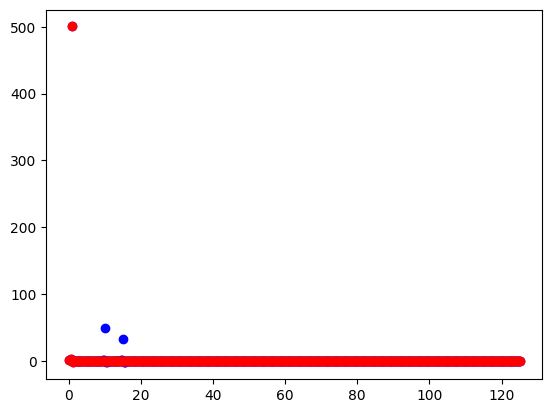

In [ ]:
filteredwave,freq = filter_noise(sumwave,time)

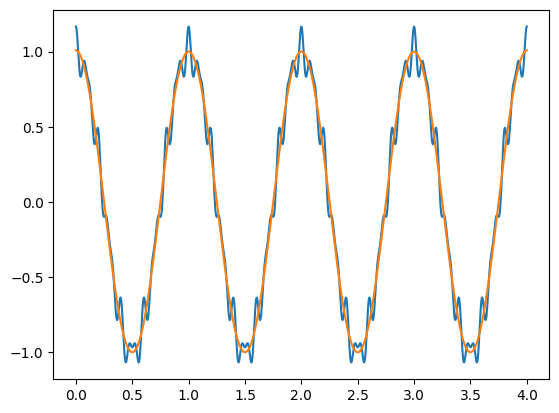

In [ ]:
plt.figure()
plt.plot(time,sumwave)
plt.plot(time,filteredwave)

# Part 4: Read in wav file and analyze it

(10 points)

We'll explore how the different combinations of waves (called *overtones*) produces different timbres for different instruments.

First we'll listen to and then download some files of different instruments playing the same note: C4, which is the same as 262 Hz, for the dominant wave.

These .wav files come from [the University of Iowa musical instrument samples](https://www.ee.columbia.edu/~dpwe/sounds/instruments/).

In [ ]:
from IPython.display import Audio,display

In [ ]:
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav'
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav'
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav'
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav'

Now download the wav files for analysis.

In [ ]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav -O pianoC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav -O trumpetC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav -O violinC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav -O fluteC4.wav

--2024-04-04 21:37:30--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8a40, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59544 (58K) [audio/x-wav]
Saving to: ‘pianoC4.wav’

pianoC4.wav         100%[===================>]  58.15K  --.-KB/s    in 0s      

2024-04-04 21:37:30 (127 MB/s) - ‘pianoC4.wav’ saved [59544/59544]

--2024-04-04 21:37:30--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8a40, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172210 (168K) [audio/x-wav]
Saving to: ‘trumpetC4.wav’

trumpetC4.wav       100%[==============

### Reading in a wav file

There are many tools to read in wave files.  We will use `scipy.io.wavfile`, but also check out [`librosa`](https://librosa.org/doc/latest/index.html).

In [ ]:
from scipy.io import wavfile

In [ ]:
samplerateV, signalV = wavfile.read('violinC4.wav')
samplerateP, signalP = wavfile.read('pianoC4.wav')
samplerateT, signalT = wavfile.read('trumpetC4.wav')
samplerateF, signalF = wavfile.read('fluteC4.wav')

ValueError: File format b'' not understood. Only 'RIFF' and 'RIFX' supported.

In [ ]:
Audio(data=signalV, rate=samplerateV)
Audio(data=signalP, rate=samplerateP)
Audio(data=signalT, rate=samplerateT)
Audio(data=signalF, rate=samplerateF)

NameError: name 'signalV' is not defined

In [ ]:
# here is an example of how to plot the violin data
NV = len(signalV)
TV = 1/samplerateV
tV = NV/samplerateV # length of recording
t_arrayV = np.arange(0,tV,TV)

NP = len(signalP)
TP = 1/samplerateP
tP = NP/samplerateP # length of recording
t_arrayP = np.arange(0,tP,TP)

NT = len(signalT)
TT = 1/samplerateT
tT = NT/samplerateT # length of recording
t_arrayT = np.arange(0,tT,TT)

NF = len(signalF)
TF = 1/samplerateF
tF = NF/samplerateF # length of recording
t_arrayF = np.arange(0,tF,TF)
plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.plot(t_arrayV,signalV)
plt.title('Amplitude vs Time Violin')
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,1,2)
plt.plot(t_arrayP,signalP)
plt.title('Amplitude vs Time Piano')
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,1,3)
plt.plot(t_arrayT,signalT)
plt.title('Amplitude vs Time Flute')
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,1,4)
plt.plot(t_arrayF,signalF)
plt.title('Amplitude vs Time Flute')
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

NameError: name 'signalV' is not defined

### Plot the fft output (power versus frequency) for all 4 instruments

Remember to just plot the first half of the output arrays:
```
plt.plot(frequency[:N//2+1],np.abs(Y[:N//2+1]))
````

Here are my results for the input signal and fft spectrum:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4a.png" height=500 ><img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4b.png" height=500 >


In [ ]:
# plot the output from fft (plot power versus frequency) for all 4 instruments
Y = fft(signalT)
tmax = T*(N-1)
df = 1/tmax
frequency=np.arange(N)*df

NameError: name 'signalT' is not defined

### Add noise to a wav file

* Download a wav file from the web, make your own, or use one of the files we already downloaded.

* Read in the file and take the `fft`.

* Add noise to the data by setting one of the fourier coefficients to a non-zero value.

* Take the `ifft` to create a new sound file.

* Play the file with noise

```Audio(data=newsignal, rate=samplerate)```


### Using phyphox

Use phyphox to analyze the frequency spectrum of each wave and compare it to your results.